# 1. Normal Distribution

/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_35354/3301865902.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f"Mean: {mean}, Std: {std}, N: {size}")


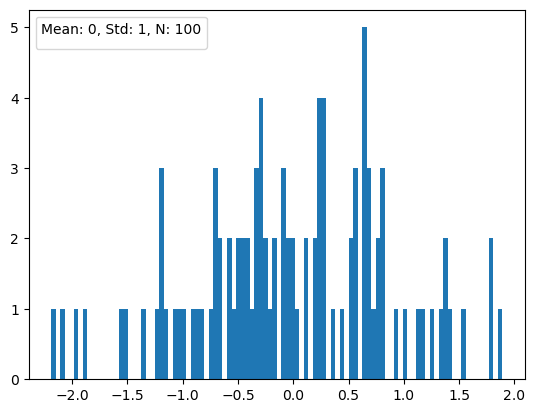

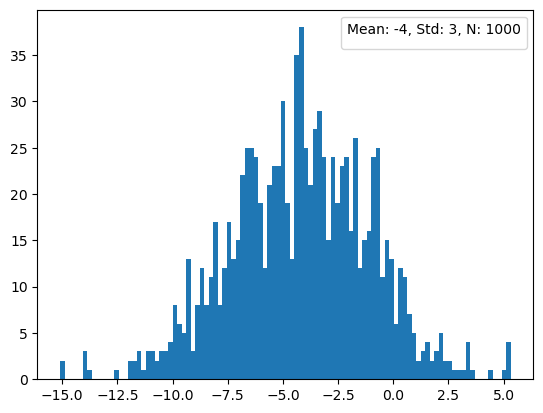

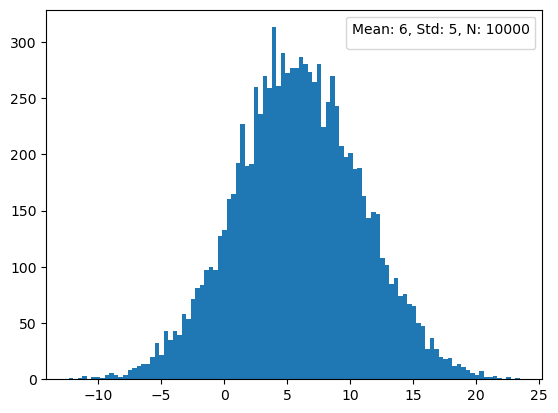

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def gen_random(mean, std, size):
    samples = np.random.normal(mean, std, size)
    plt.hist(samples, bins=100)
    plt.legend(title=f"Mean: {mean}, Std: {std}, N: {size}")
    plt.show()

# test
gen_random(0, 1, 100)
gen_random(-4, 3, 1000)
gen_random(6, 5, 10000)

# 2. Calculate moments

In [22]:
import numpy as np
import scipy.stats as stats

def mean(samples):
    sum = 0
    for s in samples:
        sum += s
    
    return sum / len(samples)

def median(samples):
    sorted = np.sort(samples)
    if len(samples) % 2 == 0:
        return 0.5 * (sorted[len(samples) // 2] + sorted[(len(samples) // 2) - 1])
    else:
        return sorted[len(samples) // 2]

def std_dev(samples):
    m = mean(samples)
    varsum = 0
    for s in samples:
        varsum += (s - m) ** 2
    
    return np.sqrt(varsum / len(samples))

def skewness(samples):
    m = mean(samples)
    std = std_dev(samples)

    skewsum = 0

    for s in samples:
        skewsum += (s - m)**3
    
    return skewsum / (len(samples) * (std**3))

def kurtosis(samples):
    m = mean(samples)
    std = std_dev(samples)

    kurtsum = 0

    for s in samples:
        kurtsum += (s - m)**4

    return kurtsum / (len(samples) * (std**4))

def print_stats(samples):
    print(f"Calculated mean={mean(samples)}, numpy mean={np.mean(samples)}")
    print(f"Calculated median={median(samples)}, numpy median={np.median(samples)}")
    print(f"Calculated std={std_dev(samples)}, numpy std={np.std(samples)}")
    print(f"Calculated skewness={skewness(samples)}, scipy skewness={stats.skew(samples)}")
    print(f"Calculated kurtosis={kurtosis(samples)}, scipy kurtosis={stats.kurtosis(samples, fisher=False)}")

# test
samples = np.random.normal(3, 2, 100)


# 3. Stats on Auto.csv

########## DISPLACEMENT ##########
Calculated mean=194.41198979591837, numpy mean=194.41198979591837
Calculated median=151.0, numpy median=151.0
Calculated std=104.51044418133284, numpy std=104.51044418133284
Calculated skewness=0.698981282352114, scipy skewness=0.6989812823521123
Calculated kurtosis=2.2163080150543193, scipy kurtosis=2.2163080150543175


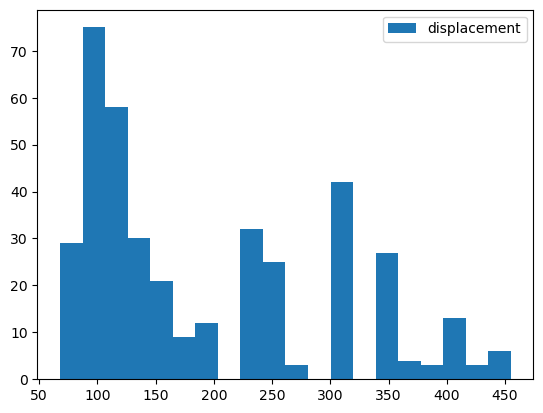

########## HORSEPOWER ##########
Calculated mean=104.46938775510205, numpy mean=104.46938775510205
Calculated median=93.5, numpy median=93.5
Calculated std=38.442032714425984, numpy std=38.442032714425984
Calculated skewness=1.0831611646869377, scipy skewness=1.0831611646869432
Calculated kurtosis=3.6728218851055945, scipy kurtosis=3.6728218851056105


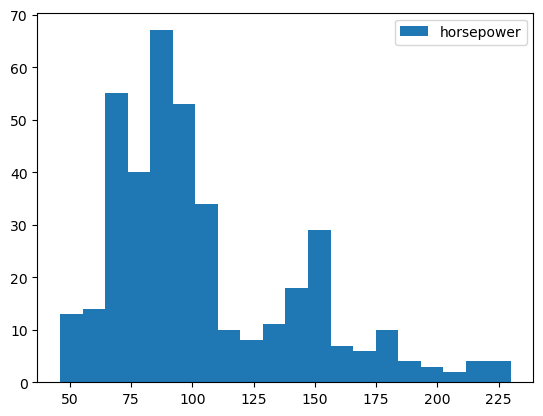

In [27]:
import pandas as pd

df = pd.read_csv("Auto.csv", na_values='?')
df = df.dropna()
#print(df.describe())
print('#'*10 + ' DISPLACEMENT ' + '#'*10)
print_stats(df['displacement'])
plt.hist(df['displacement'], bins=20, label='displacement')
plt.legend()
plt.show()

print('#'*10 + ' HORSEPOWER ' + '#'*10)
print_stats(df['horsepower'])
plt.hist(df['horsepower'], bins=20, label='horsepower')
plt.legend()
plt.show()


# 4. Central Limit Theorem

/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_35354/3868348492.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Original sample distribution')


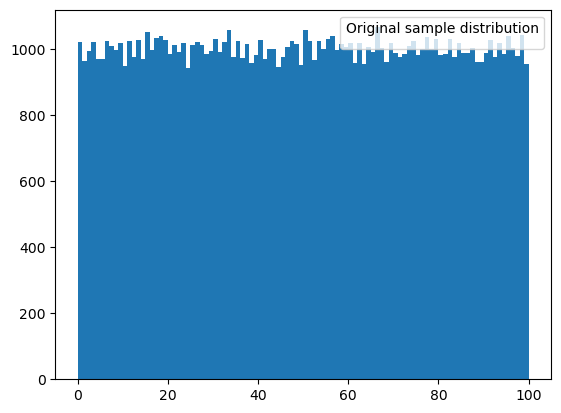

########## Plotting subsample means##########


/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_35354/3868348492.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sub-sample mean distribution')


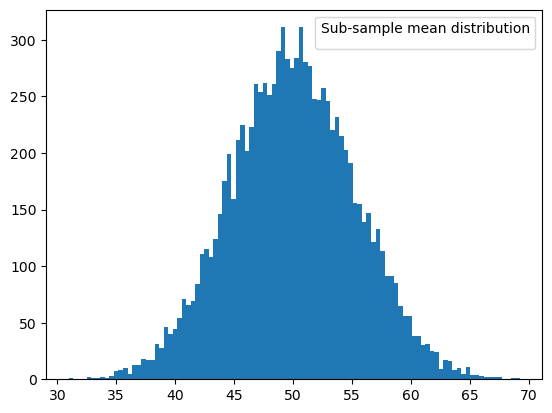

########## Stats on Original sample ##########
Theoretical mean=50.0 and std=28.86751345948129
Calculated mean=49.96413240820334, numpy mean=49.96413240820339
Calculated median=50.05070050270134, numpy median=50.05070050270134
Calculated std=28.84428619754932, numpy std=28.84428619754911
Calculated skewness=0.0020769795987126776, scipy skewness=0.00207697959870759
Calculated kurtosis=1.800615126412435, scipy kurtosis=1.8006151264124721
########## Stats on sub-sample means##########
Theoretical mean=50.0 and std=5.2704627669473
Calculated mean=50.01297242609638, numpy mean=50.01297242609618
Calculated median=49.96575709408742, numpy median=49.96575709408742
Calculated std=5.291494136437384, numpy std=5.291494136437379
Calculated skewness=0.03134392550800903, scipy skewness=0.03134392550812598
Calculated kurtosis=2.9243044669234584, scipy kurtosis=2.92430446692348


In [41]:
samples = np.random.uniform(0, 100, 100000)
plt.hist(samples, bins=100)
plt.legend(title='Original sample distribution')
plt.show()

means = []
for i in range(10000):
    subsample = np.random.choice(samples, size=30, replace=False)
    #print(subsample)
    means.append(mean(subsample))
print('#'*10+' Plotting subsample means' + '#'*10)
plt.hist(means, bins=100)
plt.legend(title='Sub-sample mean distribution')
plt.show()

print('#'*10+' Stats on Original sample ' + '#'*10)
theo_mu = (0 + 100) /2
theo_sigma = 100/np.sqrt(12)
print(f'Theoretical mean={theo_mu} and std={theo_sigma}')
print_stats(samples)

print('#'*10+' Stats on sub-sample means' + '#'*10)
theo_sub_sigma = theo_sigma/np.sqrt(30)
print(f'Theoretical mean={theo_mu} and std={theo_sub_sigma}')
print_stats(means)
